In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/ana/Coding/twitter_observador_scraper/noticias_observador_fev_a_junho.csv", index_col = "Unnamed: 0")

In [3]:
df.shape

(28735, 4)

In [4]:
df.isnull().sum()

Data      0
Titulo    0
Desc      0
Links     0
dtype: int64

In [5]:
df.dtypes

Data      object
Titulo    object
Desc      object
Links     object
dtype: object

In [6]:
df.head()

,Data,Titulo,Desc,Links
0,2020-02-01,Coronavírus. Portugueses ficam 14 dias isolados - como aconteceu,"Os 18 portugueses vindos de Wuhan já aterraram no aeroporto de Figo Maduro. Vão ser novamente analisados. O hospital Pulido Valente, em Lisboa, e o Militar, no Porto, estão prontos para os receber.",https://observador.pt/2020/02/01/aviao-que-vai-buscar-portugueses-nao-tem-autorizacao-para-sair-do-vietname/
1,2020-02-01,"Wuhan Coronavírus: afinal, qual o risco?","Os coronavírus é uma família de vírus com provável origem em morcegos e que podem causar epidemias como a SARS, em que cerca de 25% dos infetados desenvolveram doença grave com mortalidade de 9% a 12%",https://observador.pt/opiniao/2019-ncov-ou-wuhan-coronavirus-afinal-qual-o-risco/
2,2020-02-01,Como o coronavírus afeta fabricantes de automóveis,"Com mais habitantes do que Portugal, Wuhan é uma espécie de “motor city” de onde saem anualmente milhares de carros para exportação. Mas o coronavírus vai deixar marcas nas contas dos fabricantes.",https://observador.pt/2020/01/31/como-o-coronavirus-afecta-fabricantes-de-automoveis/
3,2020-02-01,Centenas são repatriados a partir de Wuhan,"Vários países já estão a repatriar os seus cidadãos que viviam no epicentro do coronavírus. 17 portugueses deverão sair de Wuhan este sábado, mas a DGS ainda não sabe se vão ficar de quarentena.",https://observador.pt/programas/atualidade/centenas-sao-repatriados-a-partir-de-wuhan-portugueses-devem-embarcar-este-sabado/
4,2020-02-01,Vídeo mostra a origem do coronavírus?,Vídeo que alegadamente mostra um mercado na China onde terá surgido o foco da epidemia do coronavírus foi partilhado centenas de vezes. A publicação é falsa: as imagens foram capturadas na Indonésia.,https://observador.pt/factchecks/fact-check-video-mostra-a-origem-do-coronavirus/


### Evolução do número de notícias relacionadas com o corona vírus ao longo do tempo

#### Visualização de notícias por dia

In [7]:
df["Data"] = pd.to_datetime(df["Data"])

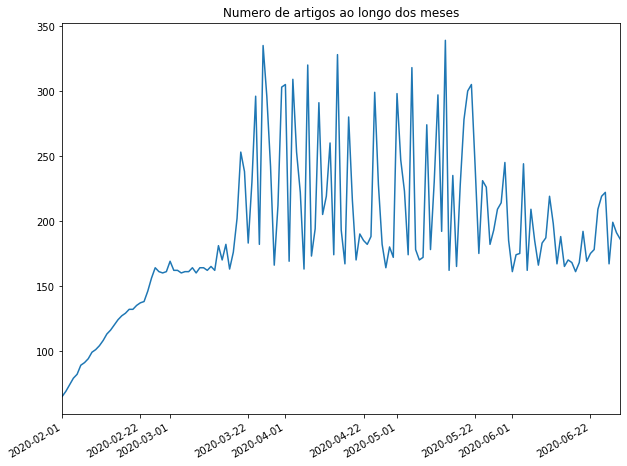

In [8]:
df.Data.value_counts(ascending=True, sort="Data").plot(figsize=(10,8),
                                                      title="Numero de artigos ao longo dos meses")


#### Visualização de notícias por mês

In [9]:
df["month"] = pd.to_datetime(df['Data']).dt.to_period('m')

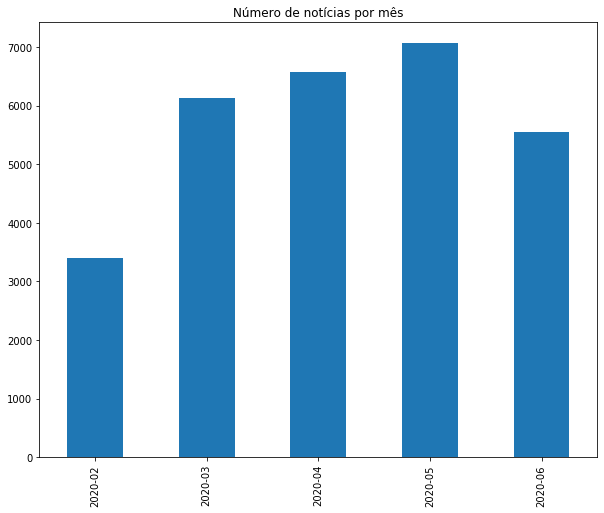

In [10]:
df["month"].value_counts().sort_index().plot(kind="bar", figsize=(10,8),
                                            title="Número de notícias por mês")

### Palavras mais comuns

In [11]:
#remove stopwords

stopwords = stopwords.words('portuguese')


In [12]:
df["title_cleaned"] = df['Titulo'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
df["title_cleaned"].head()

0    Coronavírus. Portugueses ficam 14 dias isolados - aconteceu
1    Wuhan Coronavírus: afinal, risco?                          
2    Como coronavírus afeta fabricantes automóveis              
3    Centenas repatriados partir Wuhan                          
4    Vídeo mostra origem coronavírus?                           
Name: title_cleaned, dtype: object

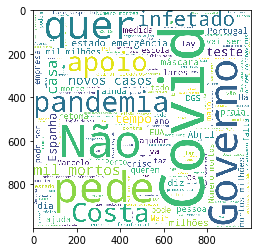

In [13]:
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                min_font_size = 10).generate("".join(df["title_cleaned"])) 

plt.imshow(wordcloud)

##### Fevereiro

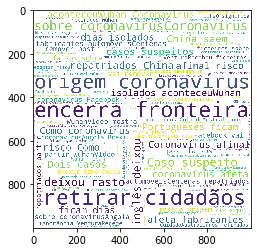

In [14]:
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                min_font_size = 10).generate("".join(df[df['month'].dt.month==2]["title_cleaned"])) 

plt.imshow(wordcloud)

##### Março

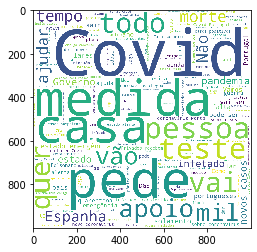

In [15]:
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                min_font_size = 10).generate("".join(df[df['month'].dt.month==3]["title_cleaned"])) 

plt.imshow(wordcloud)

##### Abril

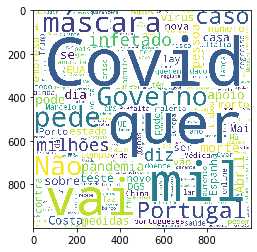

In [16]:
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                min_font_size = 10).generate("".join(df[df['month'].dt.month==4]["title_cleaned"])) 

plt.imshow(wordcloud)

##### Maio


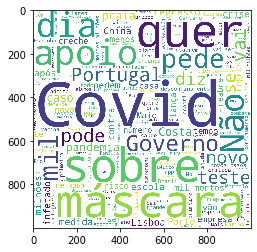

In [17]:
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                min_font_size = 10).generate("".join(df[df['month'].dt.month==5]["title_cleaned"])) 

plt.imshow(wordcloud)

##### Junho

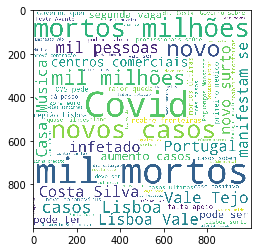

In [18]:
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white',
                min_font_size = 15).generate("".join(df[df['month'].dt.month==6]["title_cleaned"])) 

plt.imshow(wordcloud)

### Comprimento do Título

In [19]:
df["title_len"] = df["Titulo"].apply(lambda x: len(x))

In [20]:
df["title_len"].describe()

count    28735.000000
mean     51.081677   
std      7.303552    
min      1.000000    
25%      48.000000   
50%      52.000000   
75%      56.000000   
max      74.000000   
Name: title_len, dtype: float64

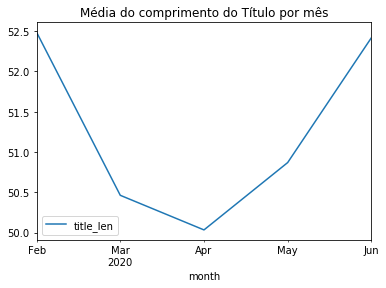

In [21]:
df.groupby('month').mean().plot(title="Média do comprimento do Título por mês")